In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split



In [4]:
# getting the labels corresponding to the image
label_df = pd.read_csv('/kaggle/input/crowd-counting/labels.csv')
label_df.columns = ['id' , 'people']
label_df.head()

,id,people
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [5]:
# loading the images in vector format
img = np.load('/kaggle/input/crowd-counting/images.npy')
#img = img.reshape(img.shape[0], img.shape[1], img.shape[2], img.shape[3],1)
img.shape

(2000, 480, 640, 3)

In [6]:
labels = np.array(label_df['people'])
labels

array([35, 41, 41, ..., 25, 26, 26])

In [7]:
# setting features and target value

x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(x_train.shape[0])
print(x_test.shape[0])

1800
200


***IMPORTANT - if you have a higher compute power then uncomment the cell below to normalize the values else dnt normalize since the notebook will crash due to memory error***

In [8]:
"""
x_train, x_test = x_train / 255.0, x_test / 255.0
"""

'\nx_train, x_test = x_train / 255.0, x_test / 255.0\n'

In [9]:
# create model 

model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(480,640,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [10]:
# add a learning rate monitor to get the lr with smoothest prediction

lr_monitor = tf.keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-8 * 10 ** (epochs/20))


In [11]:
# train the model 

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, callbacks=[lr_monitor])

Epoch 1/50
57/57 [==============================] - 18s 320ms/step - loss: 9.8828 - mae: 10.3727 - val_loss: 5.8673 - val_mae: 6.3546 - lr: 1.0000e-08
Epoch 2/50
57/57 [==============================] - 18s 314ms/step - loss: 9.3382 - mae: 9.8281 - val_loss: 5.3599 - val_mae: 5.8411 - lr: 1.1220e-08
Epoch 3/50
57/57 [==============================] - 18s 311ms/step - loss: 8.8651 - mae: 9.3528 - val_loss: 5.4733 - val_mae: 5.9570 - lr: 1.2589e-08
Epoch 4/50
57/57 [==============================] - 18s 310ms/step - loss: 8.6871 - mae: 9.1755 - val_loss: 5.4848 - val_mae: 5.9716 - lr: 1.4125e-08
Epoch 5/50
57/57 [==============================] - 18s 313ms/step - loss: 8.5664 - mae: 9.0525 - val_loss: 5.2252 - val_mae: 5.6970 - lr: 1.5849e-08
Epoch 6/50
57/57 [==============================] - 18s 311ms/step - loss: 8.4782 - mae: 8.9690 - val_loss: 5.4493 - val_mae: 5.9405 - lr: 1.7783e-08
Epoch 7/50
57/57 [==============================] - 18s 312ms/step - loss: 8.1219 - mae: 8.6092 - v

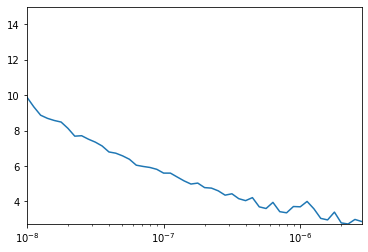

In [12]:
# plot mae
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([np.min(history.history['lr']), np.max(history.history['lr']), np.min(history.history['loss']), 15])
plt.show()

In [13]:
np.max(history.history['lr'])

2.8183829e-06

***seems like the model gives smooth results for (lr = 1e-6)***

In [14]:
# change the learning rate to 1e-5 and re-run the model

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [15]:
# train the model 

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
57/57 [==============================] - 18s 312ms/step - loss: 12.6683 - mae: 2.7944 - val_loss: 6.6690 - val_mae: 2.0090
Epoch 2/100
57/57 [==============================] - 18s 311ms/step - loss: 8.4472 - mae: 2.3241 - val_loss: 5.4010 - val_mae: 1.8191
Epoch 3/100
57/57 [==============================] - 18s 310ms/step - loss: 7.9215 - mae: 2.2617 - val_loss: 6.0945 - val_mae: 1.9669
Epoch 4/100
57/57 [==============================] - 18s 311ms/step - loss: 7.9856 - mae: 2.2515 - val_loss: 5.0171 - val_mae: 1.7488
Epoch 5/100
57/57 [==============================] - 18s 311ms/step - loss: 7.3570 - mae: 2.1470 - val_loss: 4.6723 - val_mae: 1.6970
Epoch 6/100
57/57 [==============================] - 18s 310ms/step - loss: 8.8652 - mae: 2.3769 - val_loss: 4.4590 - val_mae: 1.6532
Epoch 7/100
57/57 [==============================] - 18s 310ms/step - loss: 7.9204 - mae: 2.2279 - val_loss: 4.6032 - val_mae: 1.6847
Epoch 8/100
57/57 [==============================] - 18s 310m

Epoch 62/100
57/57 [==============================] - 18s 311ms/step - loss: 3.1756 - mae: 1.4139 - val_loss: 3.5821 - val_mae: 1.4590
Epoch 63/100
57/57 [==============================] - 18s 310ms/step - loss: 3.1470 - mae: 1.4138 - val_loss: 3.2872 - val_mae: 1.4425
Epoch 64/100
57/57 [==============================] - 18s 310ms/step - loss: 3.0553 - mae: 1.3875 - val_loss: 3.9546 - val_mae: 1.6192
Epoch 65/100
57/57 [==============================] - 18s 312ms/step - loss: 3.5415 - mae: 1.5070 - val_loss: 3.1080 - val_mae: 1.3859
Epoch 66/100
57/57 [==============================] - 18s 310ms/step - loss: 3.7821 - mae: 1.5536 - val_loss: 3.3031 - val_mae: 1.3973
Epoch 67/100
57/57 [==============================] - 18s 311ms/step - loss: 3.1791 - mae: 1.4325 - val_loss: 8.2750 - val_mae: 2.4211
Epoch 68/100
57/57 [==============================] - 18s 311ms/step - loss: 3.5345 - mae: 1.4967 - val_loss: 3.9380 - val_mae: 1.5344
Epoch 69/100
57/57 [==============================] - 1

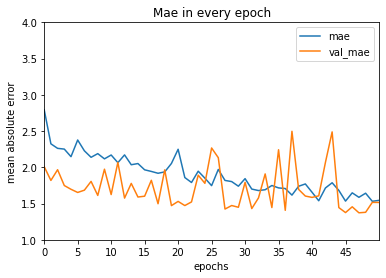

In [16]:
# plot mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.ylim(1, 4)
plt.xlim(0, 50)

plt.xticks(np.arange(0,50, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch')
plt.show()

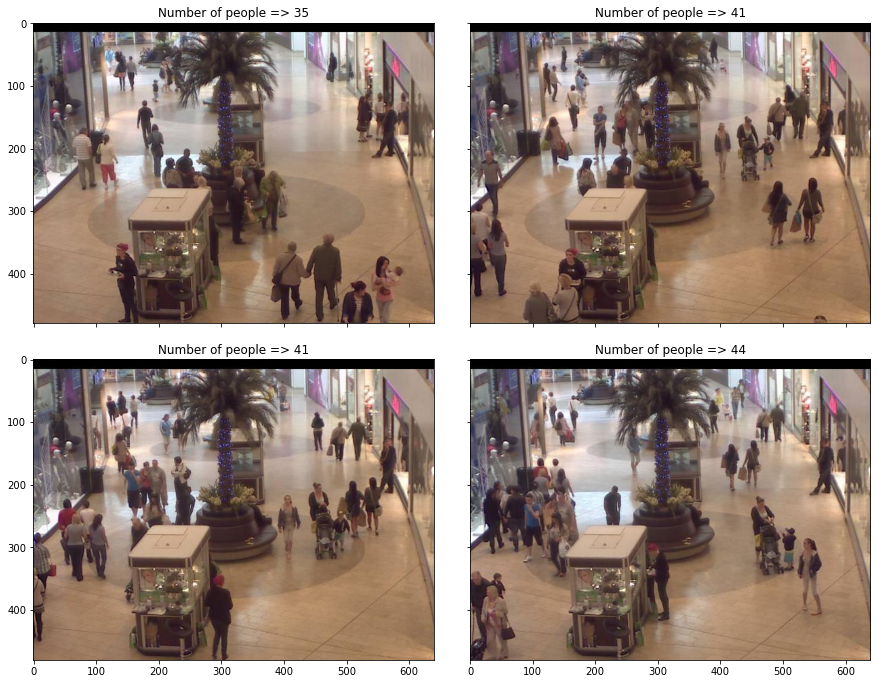

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# set figure size

fig = plt.figure(figsize=(15,15))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

for x in range(0,4):
    
    grid[x].set_title('Number of people => ' + str(labels[x]))
    grid[x].imshow(img[x])
    

***for practical implementation set the threashold to 20 people or so depending on the area the camera covers***

**and if a certain threshold is reached then raise a red flag and clear the area**

**practice social distancing and be safe**

In [18]:
labels

array([35, 41, 41, ..., 25, 26, 26])

In [21]:
labels_df=pd.DataFrame(labels)

In [22]:
labels_df.describe()

,0
count,2000.000000
mean,31.157500
std,6.945417
min,13.000000
25%,26.000000
50%,31.000000
75%,36.000000
max,53.000000


In [ ]:
labels_df